# Visualize Prediction

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]


## Chile good predictions per season

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

,id,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


### January

In [6]:
ids_to_execute = ["b33fc639"]
get_info_experiment(ids_to_execute[0], f"data/climate_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
fde0e327,index_fde0e327.parquet,anom,1,SST,190|240|-5|5,1980-2010,1972-2022
340e2882,index_340e2882.parquet,anom,1,SST,270|280|-10|0,1980-2010,1972-2022
b91ccd4e,index_b91ccd4e.parquet,max,1,MSL,245|284|-45|-15,NoRef,1972-2022
c6184040,index_c6184040.parquet,anom,1,U,282|289|-34|-30,1980-2010,1972-2022
c1c59e4d,index_c1c59e4d.parquet,anom,1,U,289|290.5|-34|-30,1980-2010,1972-2022
8c4a4c9c,index_8c4a4c9c.parquet,anom,1,U,282|289|-38|-34,1980-2010,1972-2022
cb76aaa7,index_cb76aaa7.parquet,anom,1,U,282|288.5|-43|-38,1980-2010,1972-2022
d416bd24,index_d416bd24.parquet,anom,1,U,282|288.5|-53|-43,1980-2010,1972-2022
b259d0dd,index_b259d0dd.parquet,anom,1,MSL,282|290.5|-34|-30,1980-2010,1972-2022


Executing b33fc639 iter 1
Epoch 1/200
6/6 [==============================] - 1s 26ms/step - loss: 0.9538 - val_loss: 1.0761
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.9137 - val_loss: 1.0500
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8721 - val_loss: 1.0285
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8448 - val_loss: 1.0114
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8247 - val_loss: 0.9942
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7973 - val_loss: 0.9828
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7964 - val_loss: 0.9758
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7884 - val_loss: 0.9697
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7724 - val_loss: 0.9650
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7613 - val_loss: 0.9629
Ep

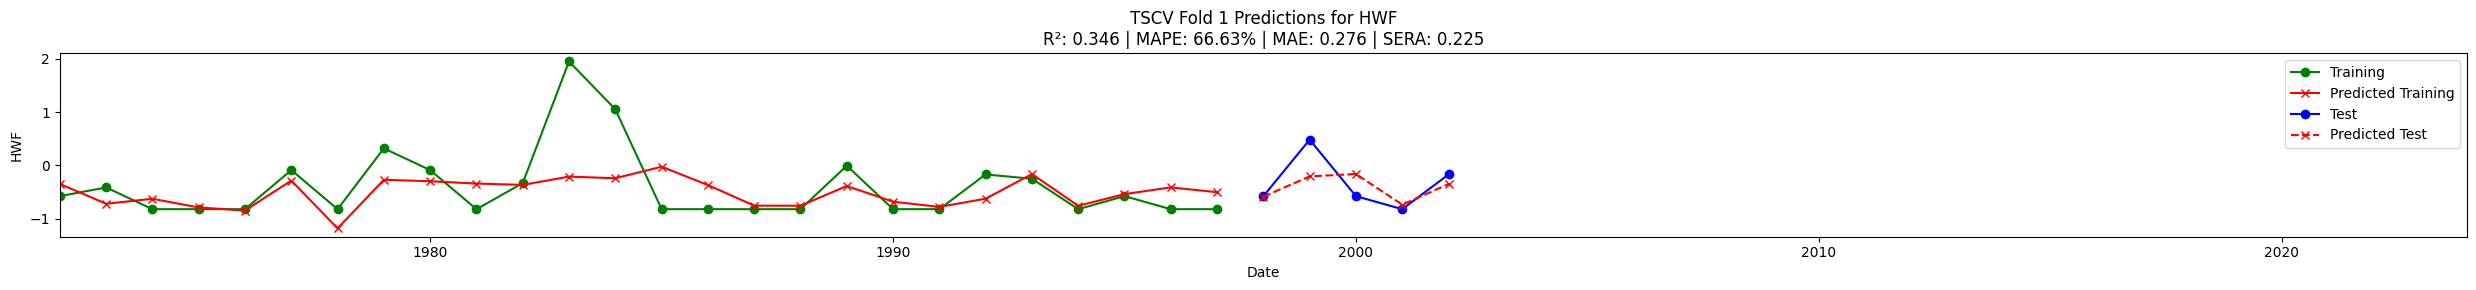

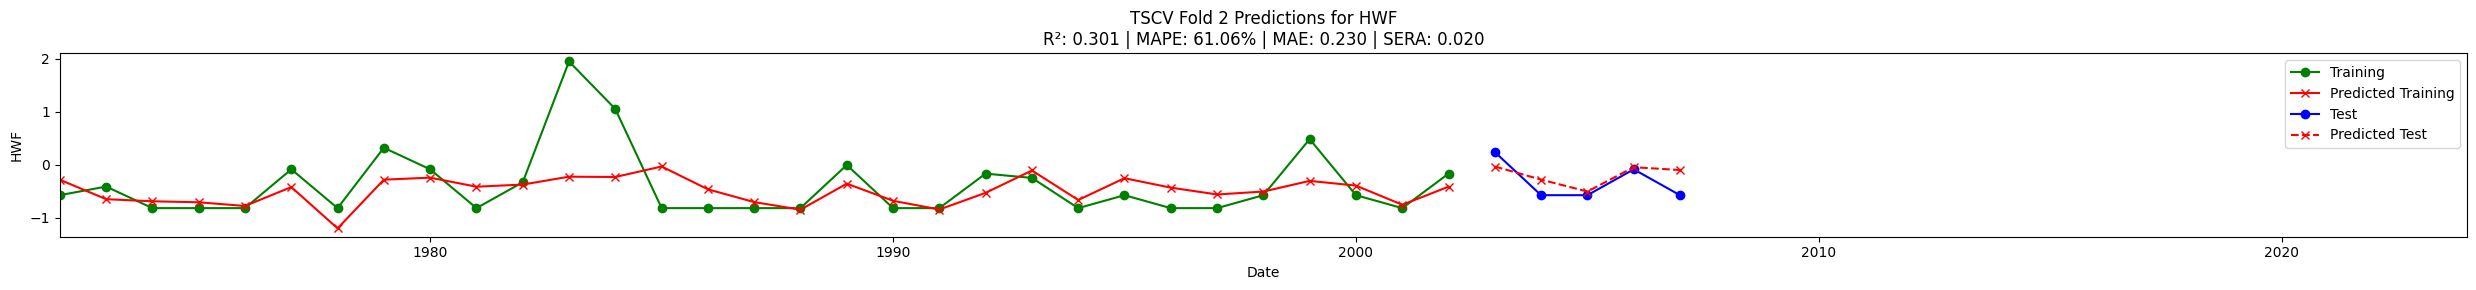

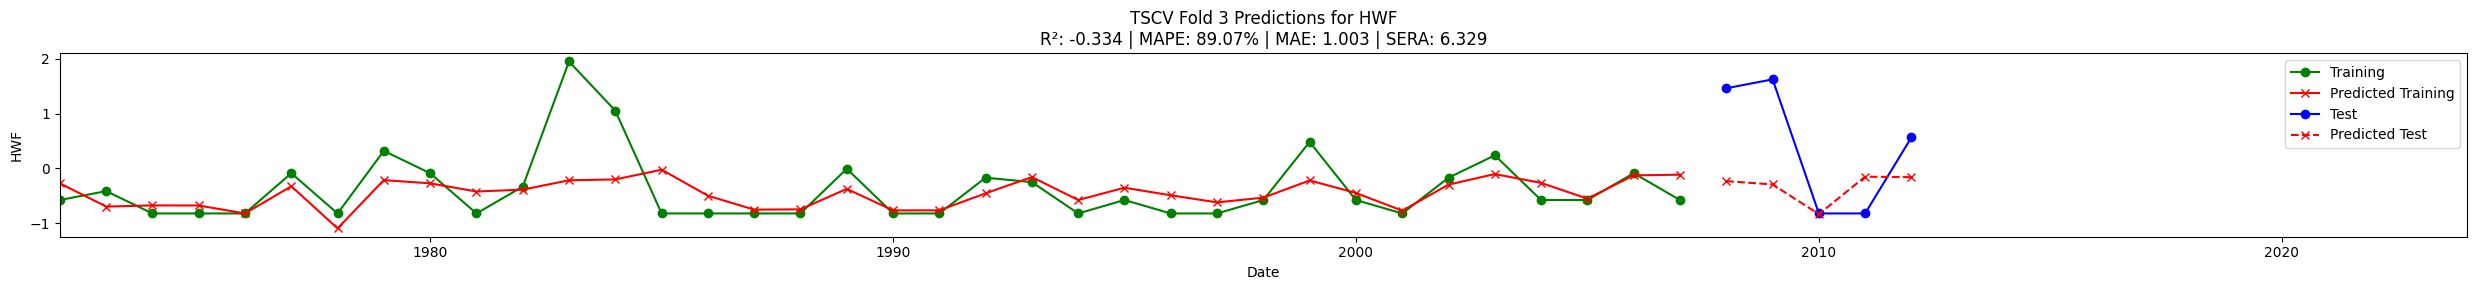

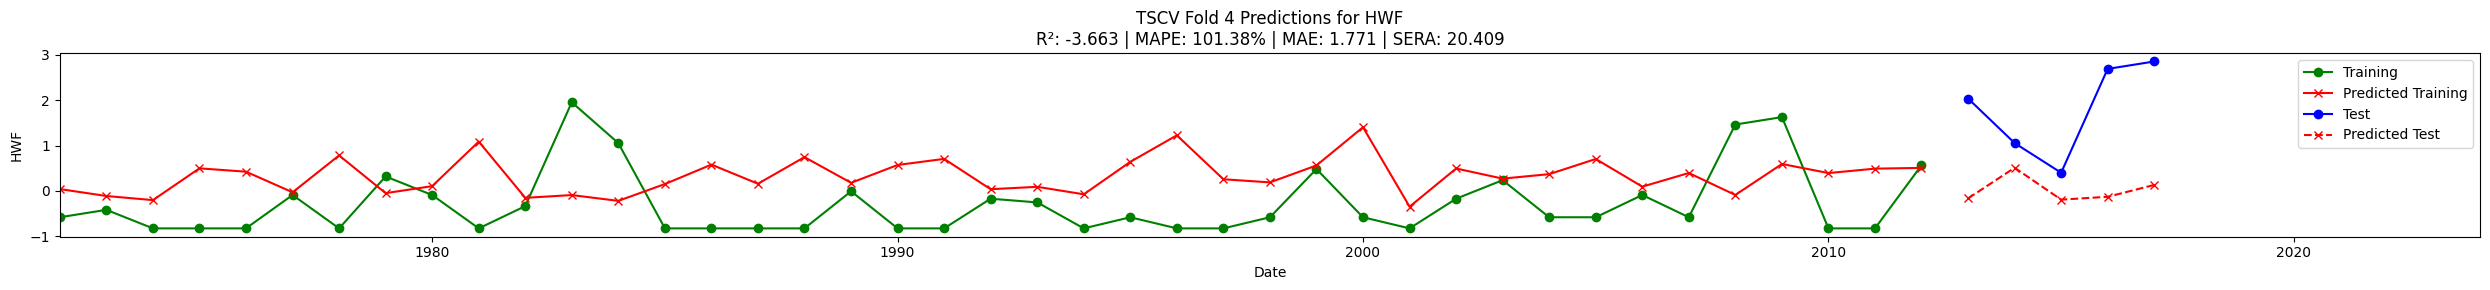

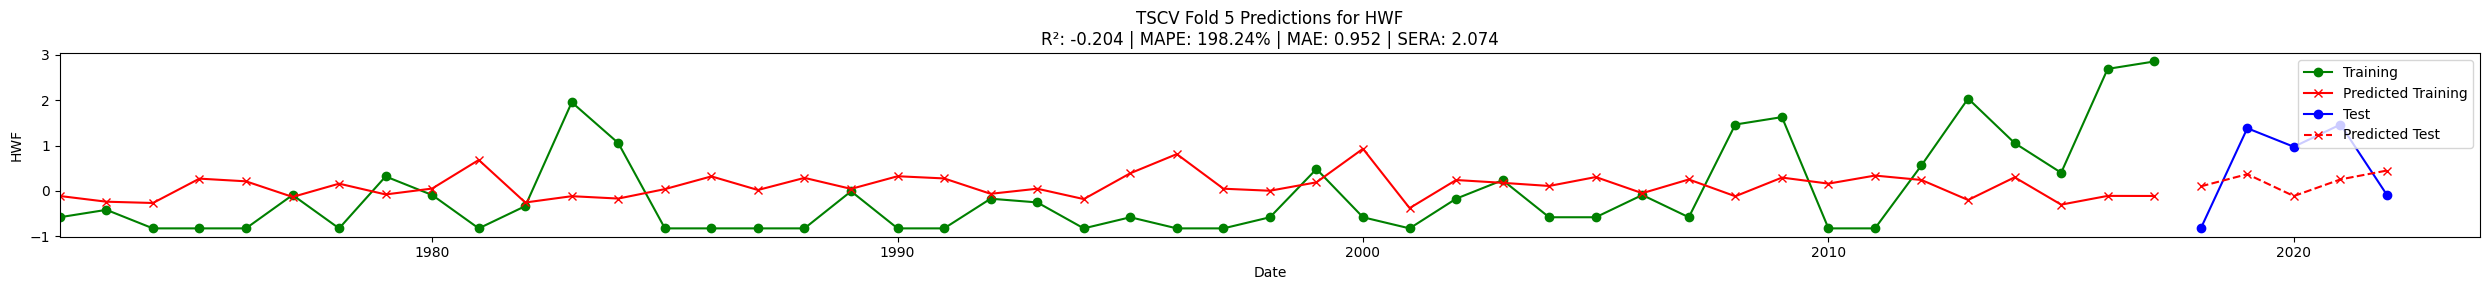

In [7]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Flatten(input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["MLP16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWF")

Epoch 1/200
6/6 [==============================] - 1s 34ms/step - loss: 0.8931 - val_loss: 0.4444
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8707 - val_loss: 0.4261
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8532 - val_loss: 0.4109
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8583 - val_loss: 0.3946
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8368 - val_loss: 0.3811
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8293 - val_loss: 0.3721
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8329 - val_loss: 0.3638
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8167 - val_loss: 0.3562
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8169 - val_loss: 0.3494
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8006 - val_loss: 0.3450
Epoch 11/200
6/6 [==========

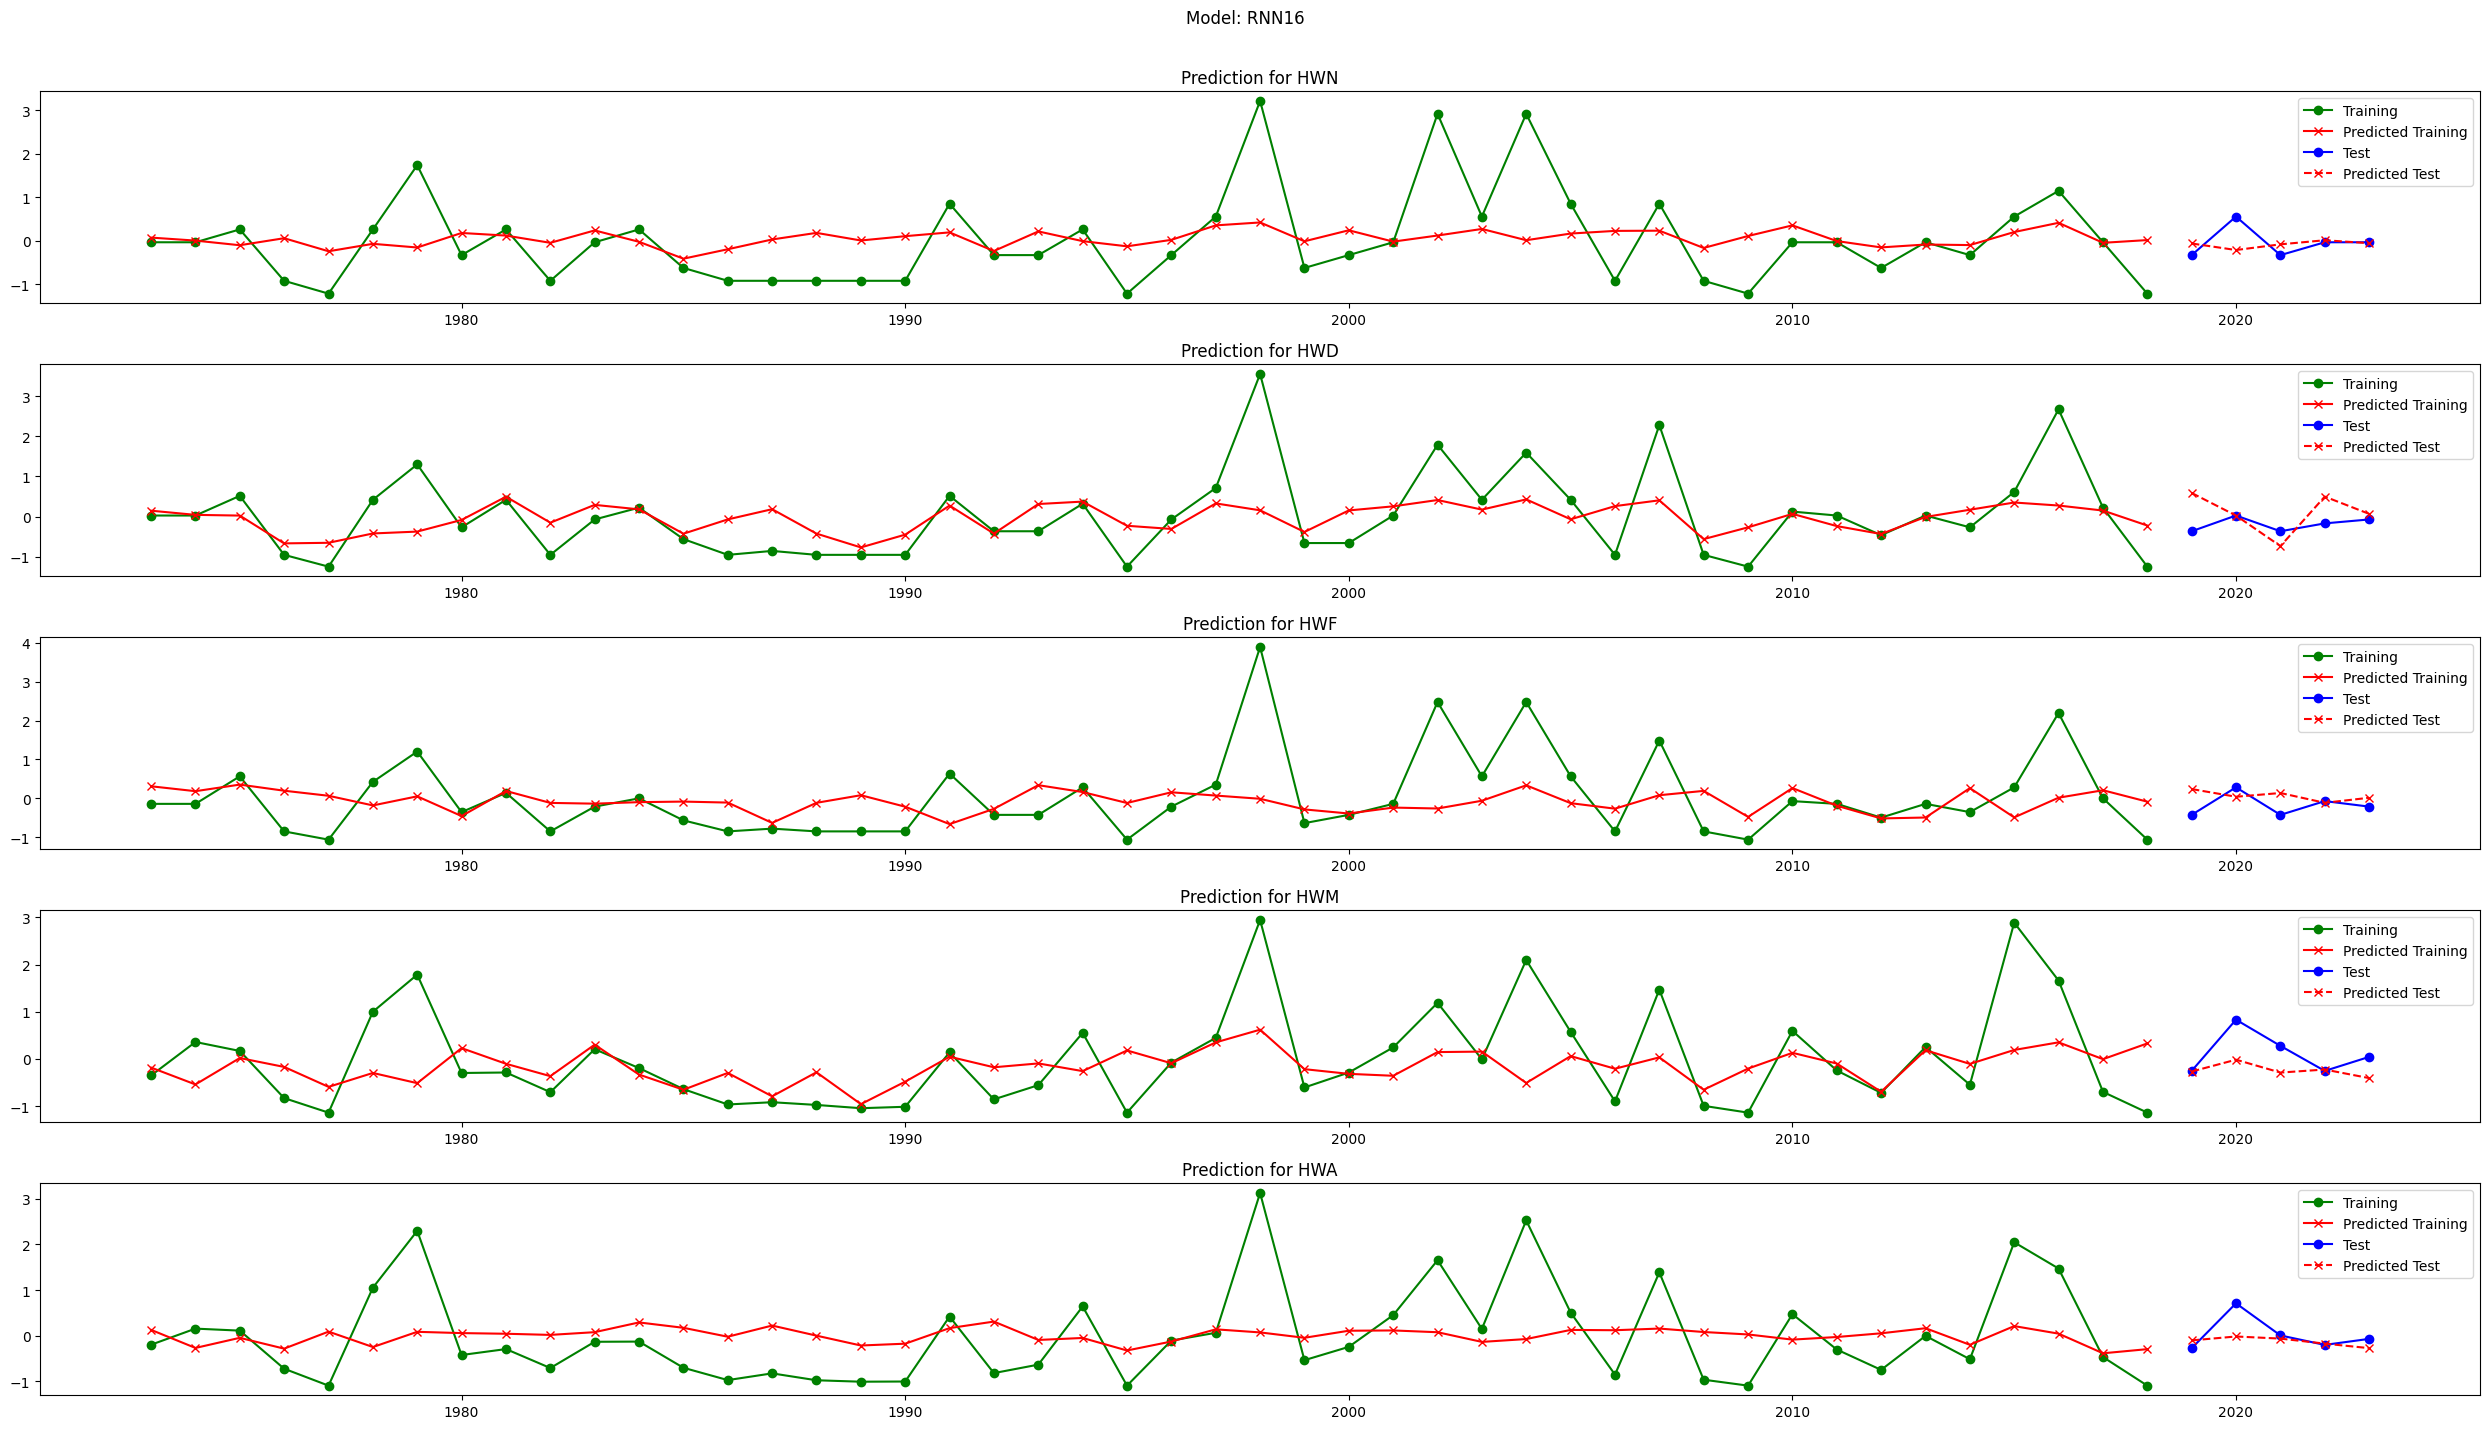

In [13]:
id = "d7101242"
season = 8
data = pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{season}.parquet")
indices = ["HWN", "HWD", "HWF", "HWM", "HWA"]

model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data.columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])

pred = PredictionModel(data, season, indices, model, name_regressor="RNN16")
pred.compile_keras_model()
y_train, y_pred_train = pred.train(5)
y_test, y_pred = pred.predict(5)
dates = pd.date_range(pd.to_datetime(f"1972-{season}"),periods=len(y_train) + len(y_test),freq=pd.offsets.YearBegin(1))
pred.plot_predictions(dates, 5, y_train, y_pred_train, y_test, y_pred)